In [120]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

In [121]:
def create_bayer_matrix(n):
    x = np.array([[0]])
    i = 0
    while n != 1:
        if i % 2 == 1 or i == 0:
            consts = np.array([0, 2, 3, 1])
            a, b, c, d = (x * 4 + const for const in consts)
        else:
            # transpose matrix
            consts = np.array([0, 3, 2, 1])
            a, b, c, d = (x * 4 + const for const in consts.T)
            a, b, c, d = a.T, b.T, c.T, d.T

        up = np.concatenate((a, b), axis=1)
        dn = np.concatenate((c, d), axis=1)
        y = np.concatenate((up, dn), axis=0)
        x = y

        n = int(n / 2)
        i += 1

    return x

In [122]:
m2 = create_bayer_matrix(2)
print('2x2 bayer_matrix:\n', m2)

m4 = create_bayer_matrix(4)
print('\n4x4 bayer_matrix:\n', m4)

m8 = create_bayer_matrix(8)
print('\n8x8 bayer_matrix:\n', m8)

# m16 = create_bayer_matrix(16)
# print('\n16x16 bayer_matrix:\n',m16)

2x2 bayer_matrix:
 [[0 2]
 [3 1]]

4x4 bayer_matrix:
 [[ 0  8  2 10]
 [12  4 14  6]
 [ 3 11  1  9]
 [15  7 13  5]]

8x8 bayer_matrix:
 [[ 0 48 12 60  3 51 15 63]
 [32 16 44 28 35 19 47 31]
 [ 8 56  4 52 11 59  7 55]
 [40 24 36 20 43 27 39 23]
 [ 2 50 14 62  1 49 13 61]
 [34 18 46 30 33 17 45 29]
 [10 58  6 54  9 57  5 53]
 [42 26 38 22 41 25 37 21]]


In [123]:
def ordered_dithering(img, dither_matrix_size):
    n = dither_matrix_size
    r = 256 / (n * n)

    bayer_matrix = create_bayer_matrix(n)
    dither_matrix = bayer_matrix / (n * n)

    (w, h, c) = img.shape
    img2 = np.zeros(img.shape,dtype='uint8')

    for x in range(w):
        for y in range(h):
            for z in range(c):
                img2[x, y, z] = img[x, y, z] + (r * dither_matrix[x % n][y % n])

    return img2

orign image


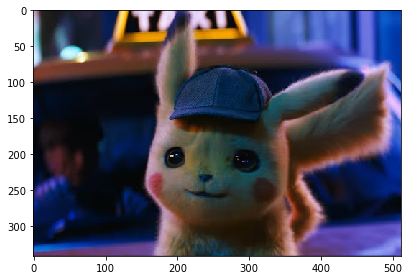

In [149]:
img = io.imread('pikachu.jpg')

print('orign image')

io.imshow(img)

dither_matrix 2x2


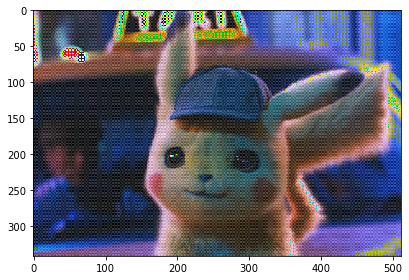

In [147]:
img = io.imread('pikachu.jpg')

dither_matrix_size = 2

print('dither_matrix {}x{}'.format(dither_matrix_size, dither_matrix_size)) 

img2 = ordered_dithering(img, dither_matrix_size)

io.imshow(img2)

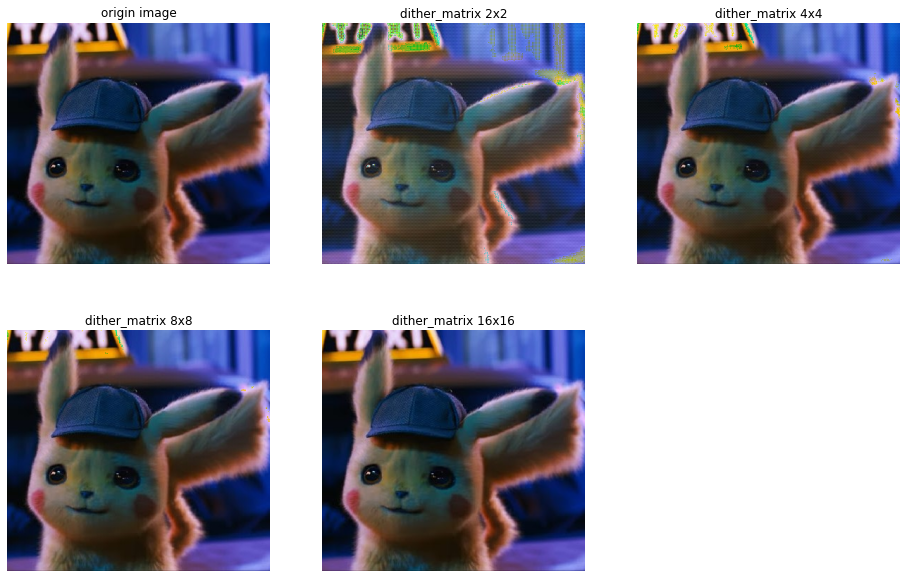

In [141]:
img = io.imread('pikachu2.jpg')

plt.figure(num='pikachu2',figsize=(16,16)) 

plt.subplot(3,3,1) 
plt.title('origin image')           
plt.imshow(img)
plt.axis('off')  

for idx,i in enumerate([2,4,8,16]):
    plt.subplot(3,3,idx+2)                  
    plt.title('dither_matrix {}x{}'.format(i,i))           
    img2 = ordered_dithering(img, dither_matrix_size=i)
    plt.imshow(img2)
    plt.axis('off')  


plt.show()   #显示窗口

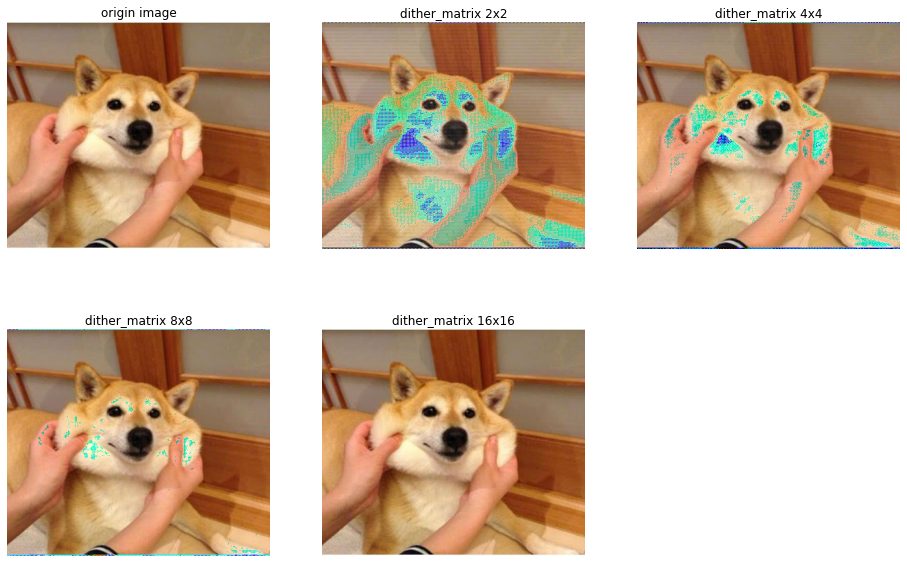

In [142]:
img = io.imread('dog.jpg')

plt.figure(num='pikachu2',figsize=(16,16)) 

plt.subplot(3,3,1) 
plt.title('origin image')           
plt.imshow(img)
plt.axis('off')  

for idx,i in enumerate([2,4,8,16]):
    plt.subplot(3,3,idx+2)                  
    plt.title('dither_matrix {}x{}'.format(i,i))           
    img2 = ordered_dithering(img, dither_matrix_size=i)
    plt.imshow(img2)
    plt.axis('off')  


plt.show()